In [8]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# df = pd.read_csv('adult.csv', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

In [5]:
print df['age'].mean()
print df['age'].median()
print scipy.stats.mode(df['age'])[0][0]

38.5816467553
37.0
36


In [6]:
print df['education-num'].mean()
print df['education-num'].median()
print scipy.stats.mode(df['education-num'])[0][0]

10.0806793403
10.0
9


In [7]:
print df['hours-per-week'].mean()
print df['hours-per-week'].median()
print scipy.stats.mode(df['hours-per-week'])[0][0]

40.4374558521
40.0
40


In [8]:
e3 = df.groupby('age').mean()[['education-num', 'hours-per-week']]
print e3.head()

     education-num  hours-per-week
age                               
17        6.648101       21.367089
18        8.152727       25.912727
19        9.096910       30.678371
20        9.345286       32.280212
21        9.434722       34.034722


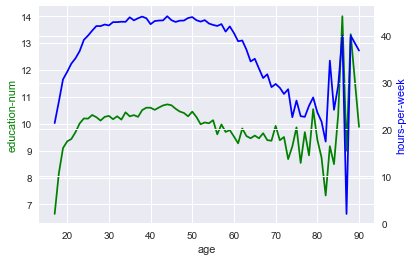

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(e3.index, e3['education-num'], 'g-')
ax2.plot(e3.index, e3['hours-per-week'], 'b-')
ax1.set_xlabel('age')
ax1.set_ylabel('education-num', color='g')
ax2.set_ylabel('hours-per-week', color='b')
plt.show()

In [10]:
lm = linear_model.LinearRegression()
model = lm.fit(df['age'].values.reshape(-1,1), df['education-num'])
print "a1 = ", lm.coef_[0], " b1 = ", lm.intercept_
print "Predicted education-num of a 23-year-old person: ", model.predict(pd.DataFrame([[23]]))[0]

lm = linear_model.LinearRegression()
model = lm.fit(df['age'].values.reshape(-1,1), df['hours-per-week'])

print "a2 = ", lm.coef_[0], " b2 = ", lm.intercept_
print "Predicted hours-per-week of a 23-year-old person: ", model.predict(pd.DataFrame([[23]]))[0]

a1 =  0.00688938878136  b1 =  9.81487537599
Predicted education-num of a 23-year-old person:  9.97333131796
a2 =  0.0622382165376  b2 =  38.036202967
Predicted hours-per-week of a 23-year-old person:  39.4676819473


In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(df[['age', 'education-num']].values.reshape(-1,2), df['hours-per-week'])
print "a = ", lm.intercept_, " b = ", lm.coef_[0], " c = ", lm.coef_[1]
print "Predicted hours-per-week of a 23-year-old person who has 31 years in education-num: ", model.predict(pd.DataFrame([[23, 31]]))[0]

a =  31.1679925104  b =  0.0574171902632  c =  0.699775615423
Predicted hours-per-week of a 23-year-old person who has 31 years in education-num:  54.1816319646


In [14]:
cancer = pd.read_csv('cancer.csv', index_col=0, names=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
cancer_df = pd.get_dummies(cancer, columns=['Class'], drop_first=True)
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class_4                        699 non-null uint8
dtypes: int64(8), object(1), uint8(1)
memory usage: 55.3+ KB
None


In [17]:
cancer_df['Bare Nuclei'] = pd.to_numeric(cancer_df['Bare Nuclei'], errors='coerce')
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].median())
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype(int)
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class_4                        699 non-null uint8
dtypes: int32(1), int64(8), uint8(1)
memory usage: 52.6 KB
None


In [18]:
logit_model = sm.Logit(cancer_df.loc[:, 'Class_4'], cancer_df.iloc[:, :9])

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                              Results: Logit
Model:                   Logit                No. Iterations:       8.0000 
Dependent Variable:      Class_4              Pseudo R-squared:     -inf   
Date:                    2018-03-19 19:36     AIC:                  inf    
No. Observations:        699                  BIC:                  inf    
Df Model:                8                    Log-Likelihood:       -inf   
Df Residuals:            690                  LL-Null:              -75244.
Converged:               1.0000               Scale:                1.0000 
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Clump Thickness             -0.3365   0.0569 -5.9147 0.0000 -0.4480 -0.2250
Uniformity of Cell Siz

D:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
D:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [26]:
a = np.arange(6).reshape((2, -1))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [15]:
?np.reshape

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta